# Relation entre les symptomes d"anxieté et l'image de soi chez les enfants du primaire.

Cette étude vise à explorer la relation entre les symptômes d'anxiété et l'image de soi chez les enfants du primaire, ainsi que le rôle médiateur des conflits dans la relation enseignant-élève. En utilisant des données issues d'une vaste étude universitaire sur le développement psychosocial des enfants, nous avons examiné si un niveau élevé d'anxiété est associé à une image de soi plus négative et comment les conflits dans la relation enseignant-élève peuvent influencer cette relation.

#### ****Questions de recherche****

1. Le niveau de symptômes d’anxiété dans le groupe 6 est-il en corrélation avec le niveau d’estime de soi la même année ?
2. Dans quelle mesure l’association entre les symptômes d’anxiété en 6e année et l’estime de soi la même année est-elle médiée par les conflits dans la relation enseignant-élève rapportés par l’enseignant ?

#### ****Hypothèses****
- Il existe une relation négative entre le prédicteur « niveau de symptômes d'anxiété » et la variable dépendante « image de soi globale » dans le groupe 6.
- Pour les élèves ayant plus de conflits dans la relation enseignant-élève, le niveau de symptômes d'anxiété du groupe 6 sera associé à une image globale de soi plus négative dans le groupe 6 que pour les élèves ayant moins de conflits dans la relation enseignant-élève.

## Méthodologie de recherches

### Choix des variables et sources des données

Le but de notre analyse de données consiste à examiner le lien qui existe  entre les symptômes d’anxiété et l’image de soi chez les enfants de primaire et à  aussi explorer le rôle médiateur des conflits dans la relation enseignant-élève dans cette relation. Un tel succès à notre analyse requiert des variables et des données se ralliant très bien à notre étude de recherche.  Ainsi, notre variable de réponse ou encore notre variable cible  est ***l’image de soi globale***. Avec cette variable, nous ferons des analyses de données qui nous fourniront des insights précieux pour répondre à notre étude de recherche. Notre base de données mesure cette variable cible par (échelle « image de soi générale » du questionnaire CBSK : SC4.6, SC8.6, SC12.6, SC16.6, SC20.6R, SC24.6).

Seule la variable cible de notre jeu de données ne permet pas de réaliser une étude profonde avec des résultats pertinents. À ces mots, nos variables d’étude comprennent également des variables nommées variables indépendantes ou encore variables prédictrices. Dans notre contexte d’analyse, il s’agit bien des variables comme : ***Du niveau de symptômes d'anxiété*** (échelle GAD du questionnaire RCADS : RC1.6, RC5.6, RC9.6, RC11.6, RC13.6) et ***des conflits dans la relation enseignant-élève*** (questionnaire LLRV : LL1.6, LL2.6, LL3.6, LL4.6, LL5.6).

Le choix de nos variables, la nature de notre jeu de données et les objectifs de notre étude nous permettent de réaliser une étude quantitative afin de fournir des conclusions significatives. **Les données pour cette analyse sont collectées durant une étude universitaire plus vaste qui examine le développement psychosocial des enfants à l'école primaire.**

### Descriptions de la modélisation statistique
L’objet dont faite question  notre recherche nous impose certaines modélisations statistiques comme des tests d’hypothèses et des régressions linaires. D’abord, une ***analyse de corrélation précisément les corrélations de Pearson ou Sperman*** dans le but de  test le score  de symptôme d’anxiété et le score d’image de soi globale pour le groupe 6.

Ensuite, une ***régression linéaire*** très importante pour examiner la relation entre le niveau de symptômes d'anxiété (VI) et l'image de soi globale (VD). Nous continuerons toujours avec une régression pour l’évaluation du rôle des conflits dans la relation enseignant-élève (VM).
Une analyse qui inclura : 
- Symptômes d'anxiété (VI) → Image de soi globale (VD)
- Symptômes d'anxiété (VI) → Conflits relation enseignant-élève (VM)
- Symptômes d'anxiété (VI) et Conflits relation enseignant-élève (VM) → Image de soi globale (VD)



## Importation des librairies d'analyse

In [2]:
# importation des librairies
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

## Importation de jeu de données brut

In [3]:
spss=pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\20220609 - (GROUP)-1.xlsx')
spss.columns

Index(['ALIAS_ID', 'COH', 'MALE', 'AGE_p.6', 'AGE_p.7', 'RC_c001.6',
       'RC_c001.7', 'RC_c005.6', 'RC_c005.7', 'RC_c009.6',
       ...
       'LL_t002.6', 'LL_t002.7', 'LL_t003.6', 'LL_t003.7', 'LL_t004.6',
       'LL_t004.7', 'LL_t005.6', 'LL_t005.7', 'LL_tCONm.6', 'LL_tCONm.7'],
      dtype='object', length=111)

Notre jeu de données reçue présente des variables qui sont inutiles, plus encores des variables qui nécessitent de faire des sommes afin de créer de nouvelles:

#### Création du prédicteur la variable ***le score total pour les symptômes d'anxieté***

In [4]:
spss['scoreTotalAnxiety'] = spss[["RC_c001.6", "RC_c005.6", "RC_c009.6", "RC_c011.6", "RC_c013.6", "RC_c014.6"
]].sum(axis=1)

#### Création de la variable cible ***le score total pour l'image de soi***

Filtrage des colonnes démarrant par la lettre "S" et suppression des colonnes commençant par le chiffre 7


In [10]:

# Filtrer les colonnes qui commencent par la lettre 'S'
s_columns = [col for col in spss.columns if col.startswith('S')]

# Supprimer les colonnes qui se terminent par le chiffre 7
filtered_columns = [col for col in s_columns if not col.endswith('.7')]

# Calculer le score total pour l'image de soi
spss['scoreTotalImageSoi'] = spss[['SC_c004.6', 'SC_c008.6','SC_c012.6','SC_c016.6','SC_c020.6']].sum(axis=1)


#### Création du prédicteur la variable ***le score total pour les conflits dans la relation enseignant-élève***

In [13]:
# Filtrer les colonnes qui commencent par la lettre 'S'
s_columns = [col for col in spss.columns if col.startswith('L')]

# Supprimer les colonnes qui se terminent par le chiffre 7
filtered_columns = [col for col in s_columns if not col.endswith('.7')]

# Calculer le score total pour les conflits dans la relation enseignant-élève
spss['scoreTotalConflit'] = spss[['LL_t001.6', 'LL_t002.6', 'LL_t003.6', 'LL_t004.6', 'LL_t005.6']].sum(axis=1)

Après le feature engineering, nous créererons un nouveau dataframe.Dataframe qui sera notre nouvelle base de données pour la suite de notre analyse. 

***Nouvelle base de données pour notre analyse***

In [14]:

datasoi =spss[['MALE', 'AGE_p.6','scoreTotalConflit','scoreTotalImageSoi','scoreTotalAnxiety']]
datasoi #affichage de la base de données

,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
0,1,10.380,3,12,-994
1,0,10.250,0,12,-993
2,1,9.255,0,12,-998
3,0,-999.000,-4995,-4995,-5994
4,0,10.460,0,9,-991
...,...,...,...,...,...
783,1,-999.000,-4995,-4995,-5994
784,1,9.750,0,12,-998
785,1,10.110,0,12,-997
786,0,9.820,0,12,-994


## Analyse exploratoire des données

### Préparation des données

Avant toutes analyses, le traitement de la base de données reste une étape très cruciale pour assurer la fiabilité des résultats. Triste est de constater que notre jeu de données présentait des erreurs à corriger. Vu la complexité du jeu de données, nous commencerons par une manipulation et pré-traitement minutieux. 

les doublons sont :  16


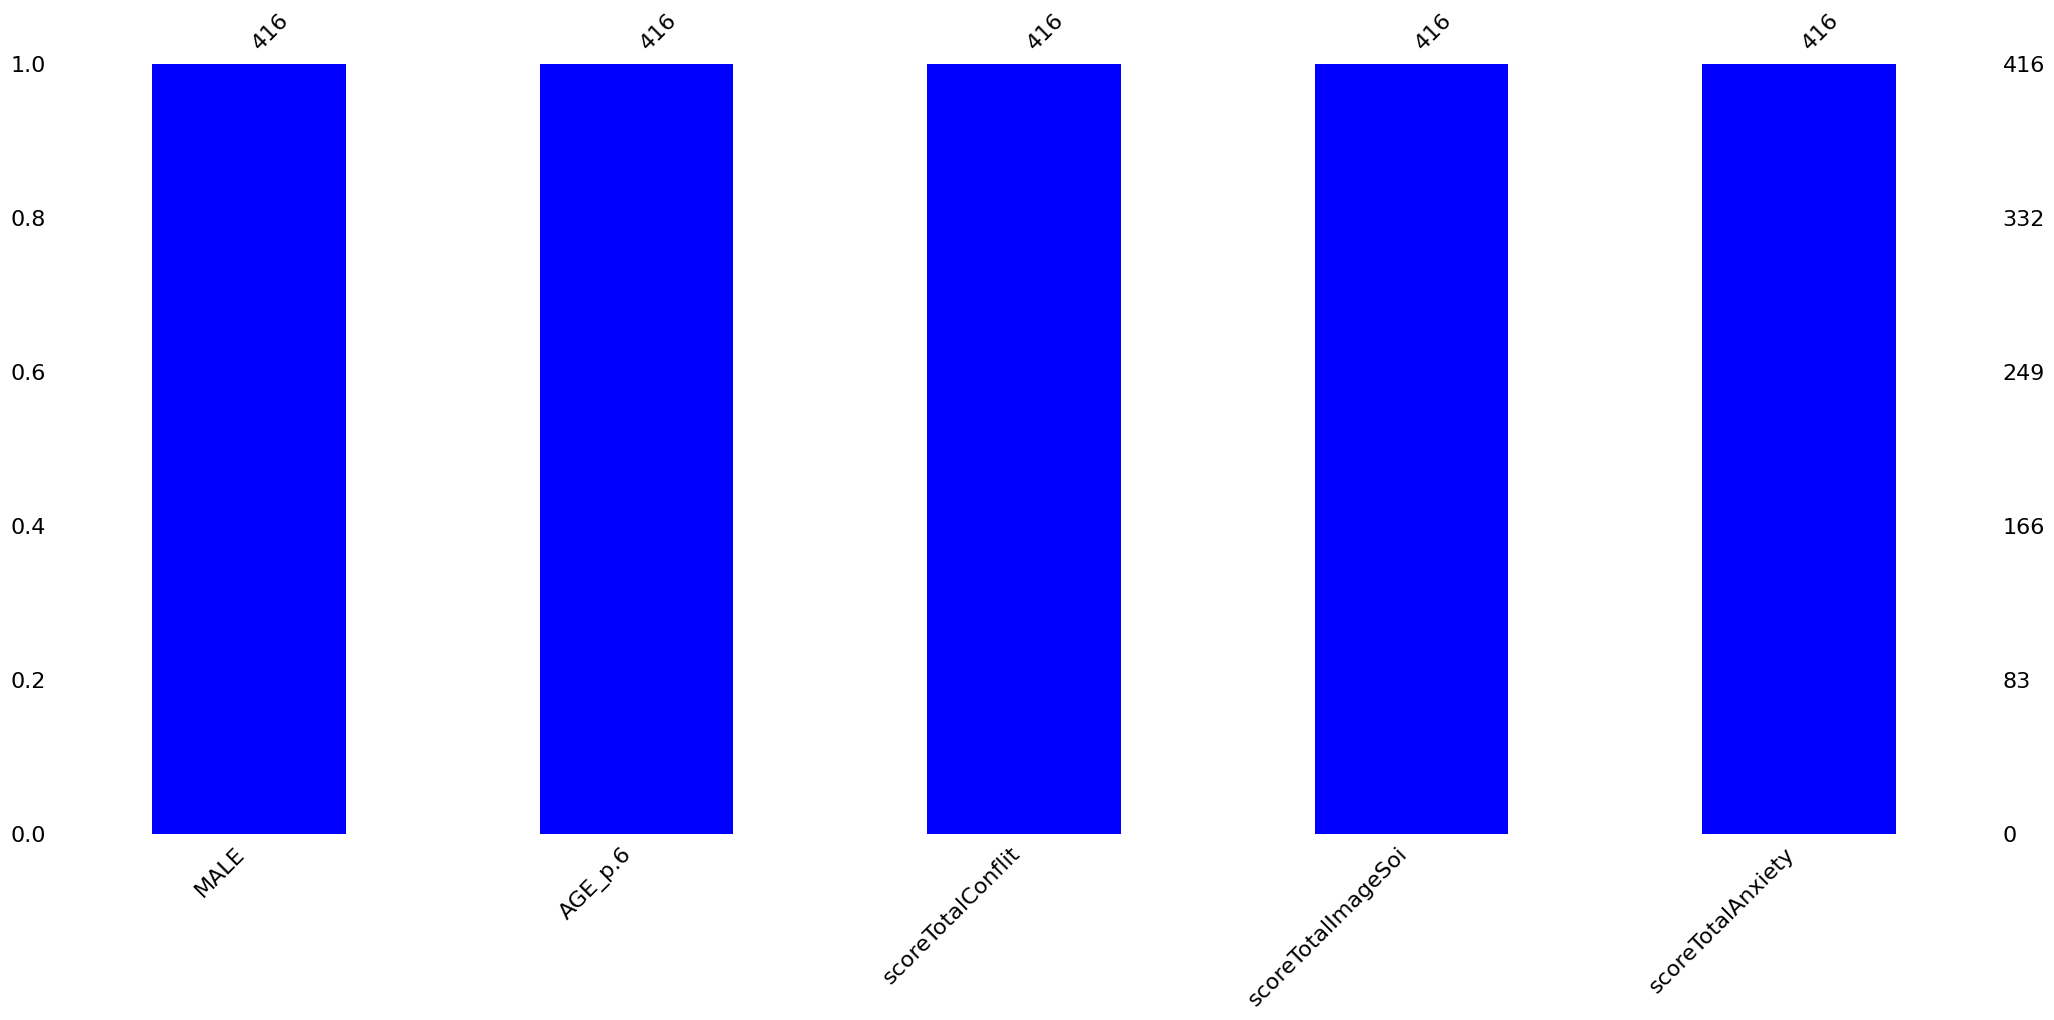

In [30]:
# vérification des doublons, des valeurs abérrantes et manquantes

# valeurs manquantes
msno.bar(datasoi, color='blue')

# doublons
doublons=datasoi.duplicated().sum()
print("les doublons sont : ",doublons)


In [31]:
# détection des outliers avec la méthode iqr
Q1 = datasoi.quantile(0.25)
Q3 = datasoi.quantile(0.75)
IQR = Q3-Q1
outliers=((datasoi<(Q1-1.5*IQR))|(datasoi >(Q3+1.5*IQR)))
valeurs_aberrantes=datasoi[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes

les valeurs aberrantes sont : 


,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
5,1,9.290,2,13,-992
10,0,10.005,0,11,-997
30,0,10.345,0,10,-994
37,0,10.150,2,12,-997
40,0,9.680,1,12,-998
...,...,...,...,...,...
755,1,9.565,1,12,-997
765,1,10.400,0,11,-991
770,0,10.500,0,10,-993
774,0,9.500,0,11,-998


In [ ]:
# suppression des lignes contenant des outliers
print('Nouvelle base de données sans les outliers :')
datasoia=datasoi.drop(valeurs_aberrantes.index)
datasoi=datasoia.drop(doublons)
datasoi

Tout d’abord, nous commenceront par traiter les valeurs manquantes, les doublons et les valeurs aberrantes. Le résultat de notre analyse ci-dessous montre que notre base de données ne comporte aucune valeur manquante qui pourrait compromettre la fiabilité de notre  analyse. Ce qui jusque là se révèle très bon pour les résultats à venir. Mais, en ce qui concerne les doublons, plus précisément les valeurs répétées, nous en avons trouvé 16  dans le jeu de données.

Par ailleurs, le nettoyage du jeu de données ne s’est pas arrêté là, car il contenait également près de 119  valeurs aberrantes. Laissez de telles valeurs aberrantes risquent de compromettre de notre analyse de données. 